# 2. Heart development analysis

Sim, Choon Boon, Belinda Phipson, Mark Ziemann, Haloom Rafehi, Richard J. Mills, Kevin I. Watt, Kwaku D. Abu-Bonsrah, et al. 2021. “Sex-Specific Control of Human Heart Maturation by the Progesterone Receptor.” Circulation 143 (16): 1614–28.

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scanpro functions
from scanpro import scanpro
from scanpro.utils import convert_counts_to_df

In [2]:
# path where figures are going to be saved
FIG_PATH = 'plots'

-------------

## Read data

In [3]:
heart_counts = pd.read_csv("data/heart_counts.tsv", sep="\t")
heart_counts

,Sample,Condition,Sex,Cardiomyocytes,Endothelial cells,Epicardial cells,Erythroid,Fibroblast,Immune cells,Neurons,Smooth muscle cells
0,f1,Fetal,Male,5475,735,564,43,1029,287,109,54
1,f2,Fetal,Male,8580,715,425,49,755,274,130,20
2,f3,Fetal,Female,5140,1298,404,31,1201,196,110,136
3,y1,Young,Male,1073,511,613,0,1622,337,207,59
4,y2,Young,Female,2221,462,280,0,1688,808,71,28
5,y3,Young,Male,4456,550,260,0,805,731,133,49
6,a1,Adult,Male,1856,599,343,0,1034,449,57,22
7,a2,Adult,Male,564,466,493,0,1230,530,43,49
8,a3,Adult,Male,383,165,92,0,495,519,14,13


In [4]:
heart = convert_counts_to_df(heart_counts, column_name="Celltype")
heart.head()

,Sample,Condition,Sex,Celltype
cell_1,f1,Fetal,Male,Cardiomyocytes
cell_2,f1,Fetal,Male,Cardiomyocytes
cell_3,f1,Fetal,Male,Cardiomyocytes
cell_4,f1,Fetal,Male,Cardiomyocytes
cell_5,f1,Fetal,Male,Cardiomyocytes


-----------

## Run Scanpro

### With replicates

In [5]:
scanpro_out = scanpro(heart, clusters_col='Celltype', conds_col='Condition', samples_col='Sample')
scanpro_out.results.to_csv("results/heart_scanpro_rep_logit.tsv", sep="\t")
scanpro_out.results

[INFO] There are more than 2 conditions. ANOVA will be performed...
[INFO] Done!


,baseline_props,mean_props_Fetal,mean_props_Young,mean_props_Adult,f_statistics,p_values,adjusted_p_values
clusters,,,,,,,
Cardiomyocytes,0.549464,0.682410,0.426761,0.273547,8.998537,1.235904e-04,3.295744e-04
Endothelial cells,0.101607,0.102108,0.092478,0.124538,0.337551,7.135154e-01,7.135154e-01
Epicardial cells,0.064167,0.051415,0.075410,0.093158,0.901016,4.061567e-01,5.415422e-01
Erythroid,0.002272,0.004433,0.000000,0.000000,197.947461,1.110223e-16,8.881784e-16
Fibroblast,0.182102,0.111342,0.261924,0.298689,4.602496,1.002678e-02,2.005356e-02
Immune cells,0.076302,0.027546,0.108751,0.189588,11.508649,1.004286e-05,4.017142e-05
Neurons,0.016143,0.012643,0.026210,0.011381,1.545816,2.131379e-01,3.410207e-01
Smooth muscle cells,0.007942,0.008102,0.008465,0.009099,0.403828,6.677589e-01,7.135154e-01


In [6]:
scanpro_out = scanpro(heart, clusters_col='Celltype', conds_col='Condition', samples_col='Sample', 
                      transform="arcsin")
scanpro_out.results.to_csv("results/heart_scanpro_rep_arcsin.tsv", sep="\t")
scanpro_out.results

[INFO] There are more than 2 conditions. ANOVA will be performed...
[INFO] Done!


,baseline_props,mean_props_Fetal,mean_props_Young,mean_props_Adult,f_statistics,p_values,adjusted_p_values
clusters,,,,,,,
Cardiomyocytes,0.549464,0.682410,0.426761,0.273547,6.555778,0.020909,0.055756
Endothelial cells,0.101607,0.102108,0.092478,0.124538,0.942304,0.429422,0.521820
Epicardial cells,0.064167,0.051415,0.075410,0.093158,0.866942,0.456592,0.521820
Erythroid,0.002272,0.004433,0.000000,0.000000,41.640675,0.000063,0.000501
Fibroblast,0.182102,0.111342,0.261924,0.298689,4.822621,0.042666,0.085332
Immune cells,0.076302,0.027546,0.108751,0.189588,9.178229,0.008657,0.034630
Neurons,0.016143,0.012643,0.026210,0.011381,2.240940,0.169327,0.270924
Smooth muscle cells,0.007942,0.008102,0.008465,0.009099,0.082549,0.921548,0.921548


#### With covariate

In [7]:
scanpro_out_cofactor = scanpro(heart, clusters_col='Celltype', conds_col='Condition', samples_col='Sample',
                               covariates="Sex")
scanpro_out_cofactor.results

[INFO] There are more than 2 conditions. ANOVA will be performed...
[INFO] Done!


,baseline_props,mean_props_Fetal,mean_props_Young,mean_props_Adult,f_statistics,p_values,adjusted_p_values
clusters,,,,,,,
Cardiomyocytes,0.549464,0.682410,0.426761,0.273547,8.304494,2.474025e-04,6.597399e-04
Endothelial cells,0.101607,0.102108,0.092478,0.124538,0.471451,6.240957e-01,6.240957e-01
Epicardial cells,0.064167,0.051415,0.075410,0.093158,0.549832,5.770469e-01,6.240957e-01
Erythroid,0.002272,0.004433,0.000000,0.000000,176.878478,1.110223e-16,8.881784e-16
Fibroblast,0.182102,0.111342,0.261924,0.298689,4.660385,9.462816e-03,1.892563e-02
Immune cells,0.076302,0.027546,0.108751,0.189588,10.094696,4.129800e-05,1.651920e-04
Neurons,0.016143,0.012643,0.026210,0.011381,1.707894,1.812470e-01,2.899952e-01
Smooth muscle cells,0.007942,0.008102,0.008465,0.009099,0.582384,5.585651e-01,6.240957e-01


### Scanpro without replicates

In [8]:
scanpro_out_norep = scanpro(heart, clusters_col='Celltype', conds_col='Condition')
scanpro_out_norep.results.to_csv("results/heart_scanpro_norep_logit.tsv", sep="\t")
scanpro_out_norep.results

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[WARNING] Consider setting transform='arcsin', as this produces more accurate results for simulated data.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 12.37 seconds


,baseline_props,mean_props_Fetal,mean_props_Young,mean_props_Adult,p_values
clusters,,,,,
Cardiomyocytes,0.549464,0.692790,0.455183,0.290838,0.003070
Endothelial cells,0.101607,0.100384,0.082951,0.129832,0.347790
Epicardial cells,0.064167,0.046936,0.064376,0.097898,0.231036
Erythroid,0.002272,0.003353,0.000000,0.000000,0.003267
Fibroblast,0.182102,0.098264,0.235793,0.289614,0.027307
Immune cells,0.076302,0.023209,0.104477,0.152232,0.009750
Neurons,0.016143,0.010659,0.022013,0.009810,0.509621
Smooth muscle cells,0.007942,0.006050,0.006348,0.008041,0.710827


In [9]:
scanpro_out_norep.design

,Fetal,Young,Adult
Condition,,,
Fetal,1.0,0.0,0.0
Young,0.0,1.0,0.0
Adult,0.0,0.0,1.0


In [10]:
scanpro_out_norep = scanpro(heart, clusters_col='Celltype', conds_col='Condition', transform="arcsin")
scanpro_out_norep.results.to_csv("results/heart_scanpro_norep_arcsin.tsv", sep="\t")
scanpro_out_norep.results

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 12.26 seconds


,baseline_props,mean_props_Fetal,mean_props_Young,mean_props_Adult,p_values
clusters,,,,,
Cardiomyocytes,0.549464,0.692790,0.455183,0.290838,0.000040
Endothelial cells,0.101607,0.100384,0.082951,0.129832,0.243245
Epicardial cells,0.064167,0.046936,0.064376,0.097898,0.127428
Erythroid,0.002272,0.003353,0.000000,0.000000,0.026868
Fibroblast,0.182102,0.098264,0.235793,0.289614,0.002783
Immune cells,0.076302,0.023209,0.104477,0.152232,0.000752
Neurons,0.016143,0.010659,0.022013,0.009810,0.334487
Smooth muscle cells,0.007942,0.006050,0.006348,0.008041,0.631939


### Plots

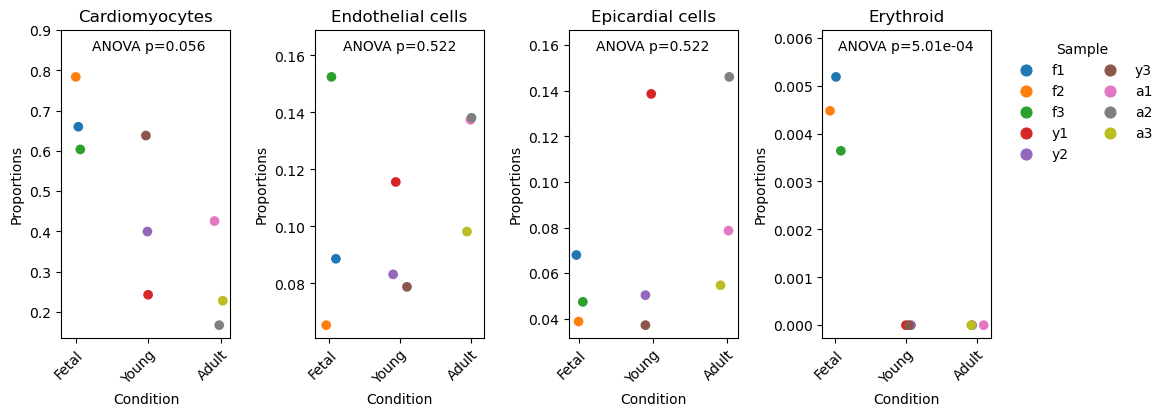

In [11]:
# original samples
scanpro_out.plot(n_columns=4, clusters=['Cardiomyocytes','Endothelial cells','Epicardial cells','Erythroid'],
                 save=f'{FIG_PATH}/heart_stripplot.pdf')

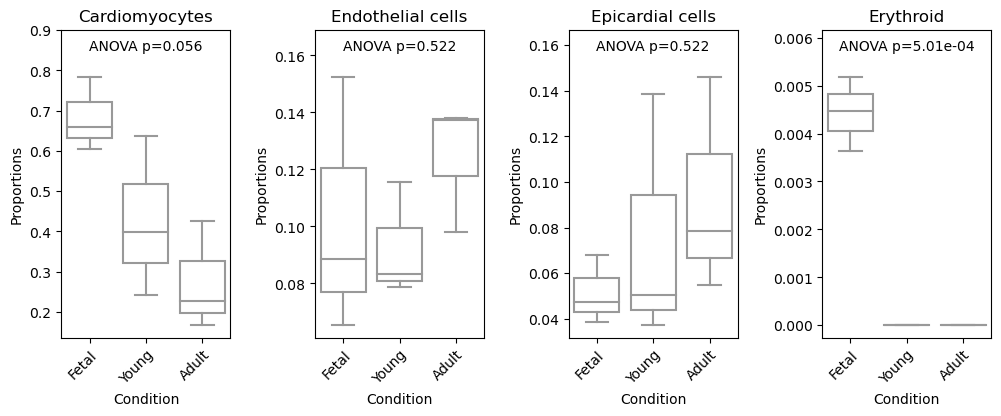

In [12]:
scanpro_out.plot(kind='boxplot', n_columns=4, clusters=['Cardiomyocytes','Endothelial cells',
                                                        'Epicardial cells','Erythroid'],
                 save=f'{FIG_PATH}/heart_boxplot.pdf')

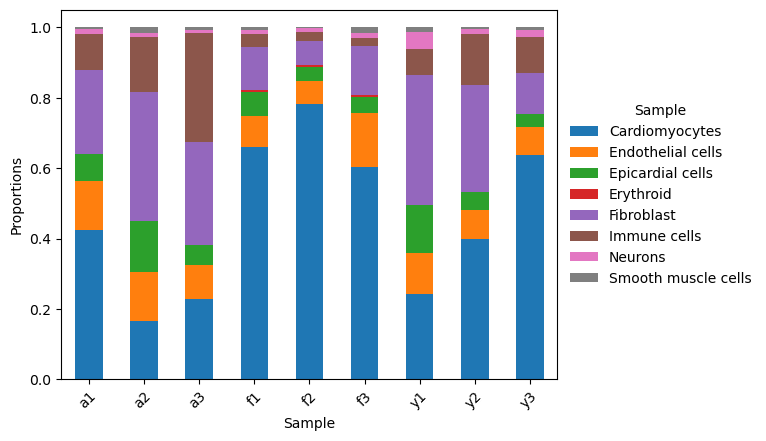

In [13]:
scanpro_out.plot_samples(save=f"{FIG_PATH}/heart_sample_barplot.pdf")

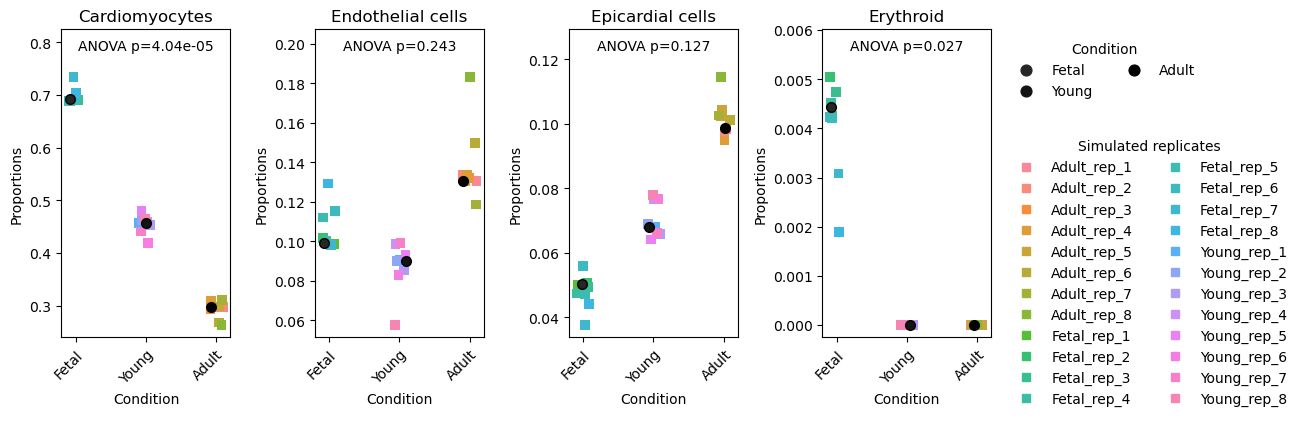

In [14]:
# Simulated replicates
scanpro_out_norep.plot(n_columns=4, clusters=['Cardiomyocytes','Endothelial cells','Epicardial cells','Erythroid'],
                       save=f'{FIG_PATH}/heart_norep_stripplot.pdf')

---------------------

## Propeller

In [15]:
#Setup path to R for propeller
R_home = os.path.dirname(sys.executable)[:-4] + "/lib/R"
os.environ["R_HOME"] = R_home
%load_ext rpy2.ipython

In [16]:
%%R -i heart -o propeller_results_logit -o propeller_results_arcsin
library(speckle)

propeller_results_logit = propeller(clusters = heart$Celltype, sample = heart$Sample, group = heart$Condition, transform="logit")
propeller_results_arcsin = propeller(clusters = heart$Celltype, sample = heart$Sample, group = heart$Condition, transform="asin")


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)
Performing logit transformation of proportions
group variable has > 2 levels, ANOVA will be performed
Performing arcsin square root transformation of proportions
group variable has > 2 levels, ANOVA will be performed


In [17]:
propeller_results_logit

,BaselineProp,PropMean.Adult,PropMean.Fetal,PropMean.Young,Fstatistic,P.Value,FDR
Erythroid,0.002272,-0.000000,0.004433,-0.000000,46.591998,5.825757e-21,4.660605e-20
Immune cells,0.076302,0.189588,0.027546,0.108751,11.575093,9.397256e-06,3.758902e-05
Cardiomyocytes,0.549464,0.273547,0.682410,0.426761,9.068229,1.152704e-04,3.073879e-04
Fibroblast,0.182102,0.298689,0.111342,0.261924,4.630794,9.747019e-03,1.949404e-02
Neurons,0.016143,0.011381,0.012643,0.026210,1.519245,2.188770e-01,3.502033e-01
Epicardial cells,0.064167,0.093158,0.051415,0.075410,0.909787,4.026099e-01,5.368133e-01
Smooth muscle cells,0.007942,0.009099,0.008102,0.008465,0.421692,6.559362e-01,7.117040e-01
Endothelial cells,0.101607,0.124538,0.102108,0.092478,0.340093,7.117040e-01,7.117040e-01


In [18]:
propeller_results_logit.to_csv("results/heart_propeller_rep_logit.tsv", sep="\t")
propeller_results_arcsin.to_csv("results/heart_propeller_rep_arcsin.tsv", sep="\t")

------------

## scCODA

In [19]:
import pertpy as pt
import anndata as ad

Installed version 0.4.0 of pertpy is outdated. Newest version is 0.5.0!

Global seed set to 0
/home/mbentse/.conda/envs/scanpro_analysis/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/mbentse/.conda/envs/scanpro_analysis/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


### Data preparation

In [20]:
sccoda_adata = ad.AnnData(obs=heart)

### With replicates

In [21]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(sccoda_adata, type="cell_level", generate_sample_level=True, cell_type_identifier="Celltype", 
                                sample_identifier="Sample", covariate_obs=["Condition"])
sccoda_data = sccoda_model.prepare(sccoda_data, modality_key="coda", formula="Condition")

Automatic reference selection! Reference cell type set to Smooth muscle cells

Zero counts encountered in data! Added a pseudocount of 0.5.

In [22]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda")

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
sample: 100%|██████████| 11000/11000 [01:47<00:00, 102.72it/s, 255 steps of size 1.96e-02. acc. prob=0.84]


In [23]:
sccoda_model.summary(sccoda_data, modality_key="coda")

                                          Compositional Analysis summary                                           
┌──────────────────────────────────────────────┬──────────────────────────────────────────────────────────────────┐
│ Name                                         │ Value                                                            │
├──────────────────────────────────────────────┼──────────────────────────────────────────────────────────────────┤
│ Data                                         │ Data: 9 samples, 8 cell types                                    │
│ Reference cell type                          │ Smooth muscle cells                                              │
│ Formula                                      │ Condition                                                        │
└──────────────────────────────────────────────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                      Final Parameter  Expected Sample                                                           │
│ Cell Type                                                                                                       │
│ Cardiomyocytes            2.410          1862.779                                                               │
│ Endothelial cells         1.551           789.046                                                               │
│ Epicardial cells          1.205           558.260                                                               │
│ Erythroid                -1.565            34.982                                                               │
│ Fibroblast                2.282          1638.973                                                               │
│ Immune cells              1.617           842.880                                                               │
│ Neurons                   0.016           170.004                                                               │
│ Smooth muscle cells      -0.341           118.964                                                               │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                Final Parameter  Expected Sample  log2-fold change                               │
│ Covariate Cell Type                                                                                             │
│ T.Fetal   Cardiomyocytes           1.512           4033.720            1.115                                    │
│           Endothelial cells        0.000            376.591           -1.067                                    │
│           Epicardial cells         0.000            266.443           -1.067                                    │
│           Erythroid                0.000             16.696           -1.067                                    │
│           Fibroblast               0.000            782.238           -1.067                                    │
│           Immune cells             0.000            402.284           -1.067                                    │
│           Neurons                  0.000             81.139           -1.067                                    │
│           Smooth muscle cells      0.000             56.779           -1.067                                    │
│ T.Young   Cardiomyocytes           0.000           1862.779            0.000                                    │
│           Endothelial cells        0.000            789.046            0.000                                    │
│           Epicardial cells         0.000            558.260            0.000                                    │
│           Erythroid                0.000             34.982            0.000                                    │
│           Fibroblast               0.000           1638.973            0.000                                    │
│           Immune cells             0.000            842.880            0.000                                    │
│           Neurons                  0.000            170.004            0.000                                    │
│           Smooth muscle cells      0.000            118.964            0.000                                    │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [24]:
# Get credible effects at different FDR levels:
credible_effects_list = []
for fdr in [0.01,0.05,0.1,0.2,0.3,0.4]:
    sccoda_model.set_fdr(sccoda_data, modality_key="coda", est_fdr=fdr)
    
    credible_effects_table = sccoda_model.credible_effects(sccoda_data, modality_key="coda").to_frame(name="credible_effect")
    credible_effects_table["fdr"] = fdr
    credible_effects_list.append(credible_effects_table)

credible_effects = pd.concat(credible_effects_list)
credible_effects

credible_effect   fdr
Covariate          Cell Type                                 
Condition[T.Fetal] Cardiomyocytes                  True  0.01
                   Endothelial cells              False  0.01
                   Epicardial cells               False  0.01
                   Erythroid                      False  0.01
                   Fibroblast                     False  0.01
...                                                 ...   ...
Condition[T.Young] Erythroid                       True  0.40
                   Fibroblast                      True  0.40
                   Immune cells                    True  0.40
                   Neurons                         True  0.40
                   Smooth muscle cells            False  0.40

[96 rows x 2 columns]

In [25]:
credible_effects.to_csv("results/heart_sccoda_rep.tsv", sep="\t")

### Without replicates

In [26]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(sccoda_adata, type="cell_level", generate_sample_level=True, cell_type_identifier="Celltype", 
                                sample_identifier="Condition", covariate_obs=["Condition"])
sccoda_data = sccoda_model.prepare(sccoda_data, modality_key="coda", formula="Condition")

Automatic reference selection! Reference cell type set to Smooth muscle cells

Zero counts encountered in data! Added a pseudocount of 0.5.

In [ ]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda")

sample:  68%|██████▊   | 7472/11000 [00:39<00:17, 204.48it/s, 255 steps of size 1.39e-02. acc. prob=0.84]

In [ ]:
sccoda_model.summary(sccoda_data, modality_key="coda")

In [ ]:
# Get credible effects at different FDR levels:
credible_effects_list = []
for fdr in [0.01,0.05,0.1,0.2,0.3,0.4]:
    sccoda_model.set_fdr(sccoda_data, modality_key="coda", est_fdr=fdr)
    
    credible_effects_table = sccoda_model.credible_effects(sccoda_data, modality_key="coda").to_frame(name="credible_effect")
    credible_effects_table["fdr"] = fdr
    credible_effects_list.append(credible_effects_table)

credible_effects = pd.concat(credible_effects_list)
credible_effects

In [ ]:
credible_effects.to_csv("results/heart_sccoda_norep.tsv", sep="\t")